In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [ ]:
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [ ]:
labels=np.asarray(df.v1)
texts=np.asarray(df.v2).astype('<U910')
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( texts, labels, test_size=0.3, random_state=0)

In [ ]:
cv = CountVectorizer()  
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [ ]:
clf = svm.SVC(kernel = 'linear', random_state = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.9814593301435407
Precision: 0.9813953488372092
Recall: 0.8865546218487395


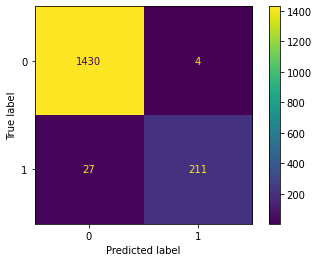

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()